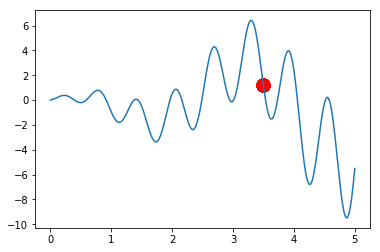

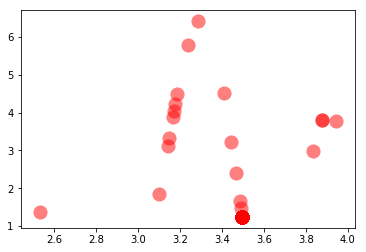

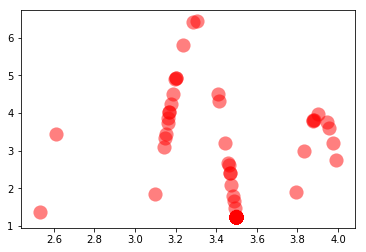

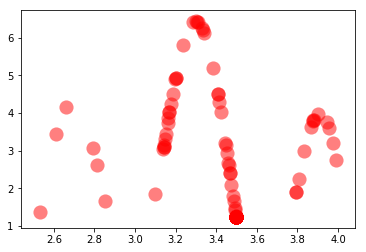

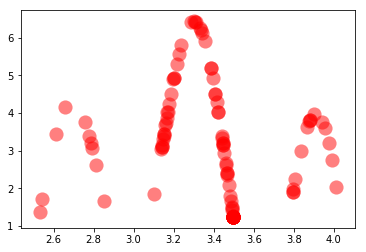

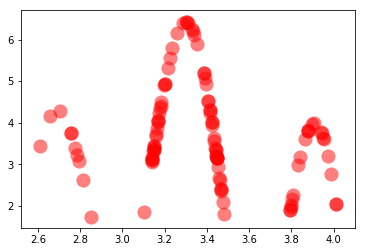

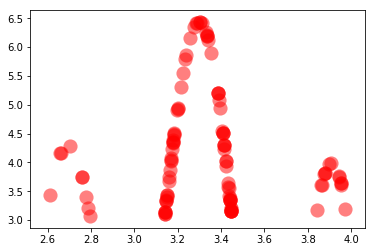

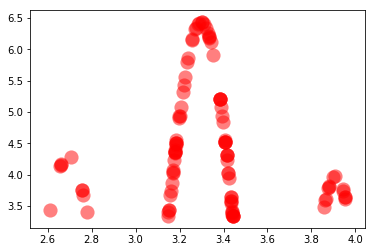

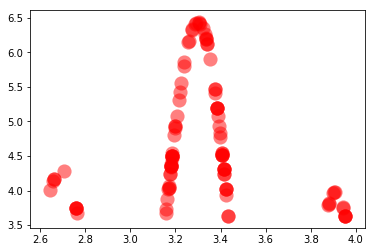

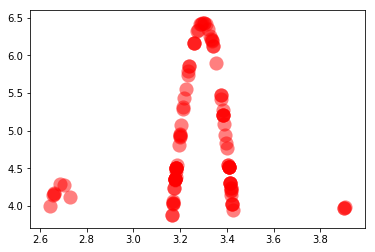

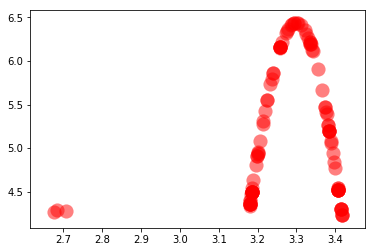

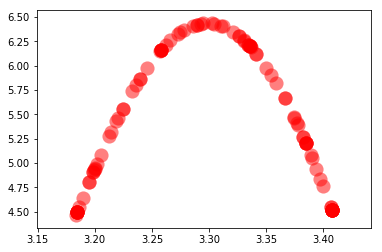

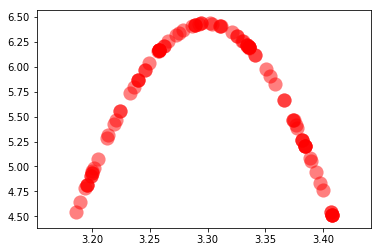

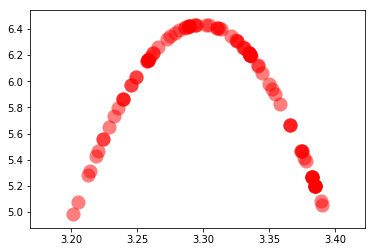

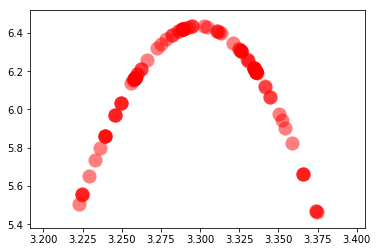

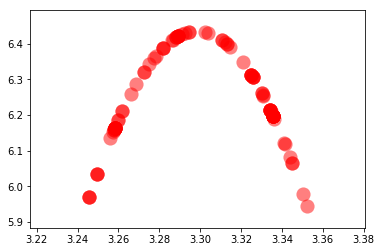

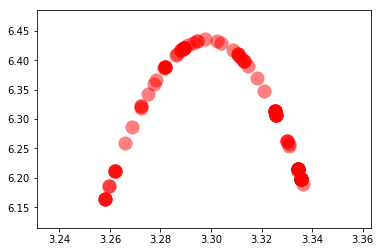

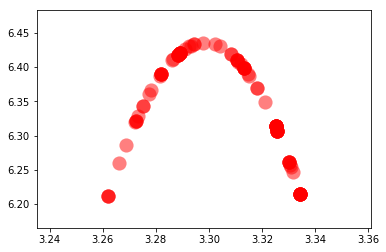

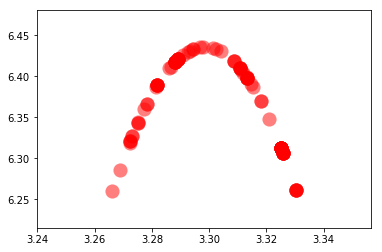

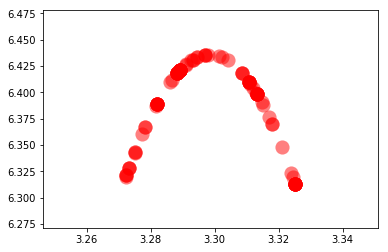

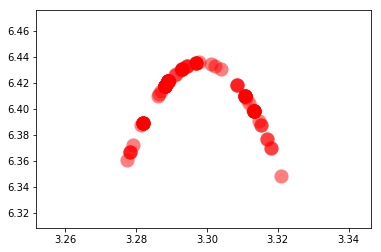

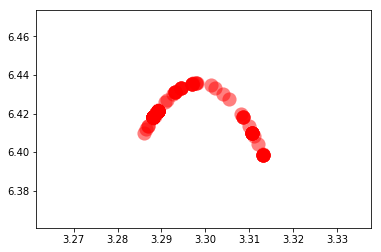

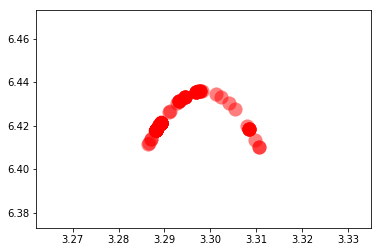

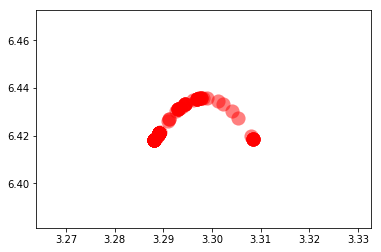

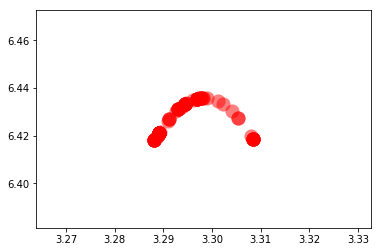

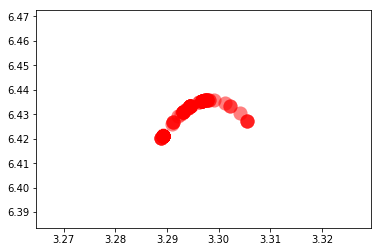

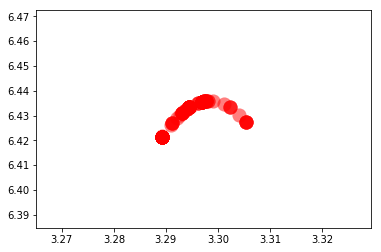

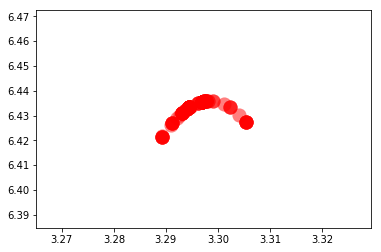

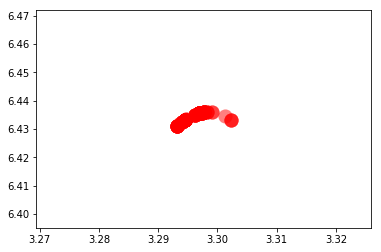

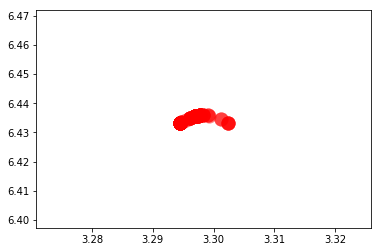

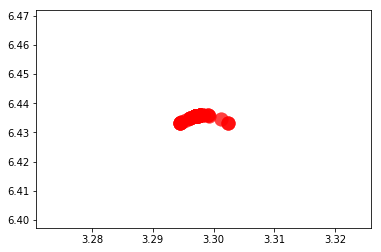

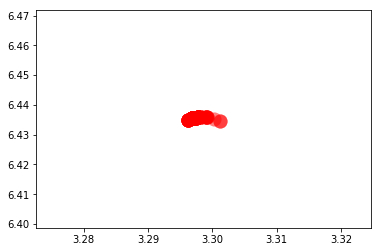

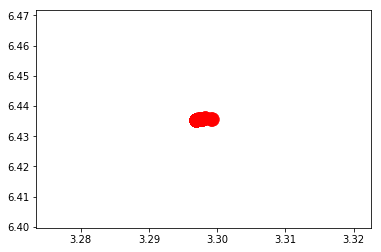

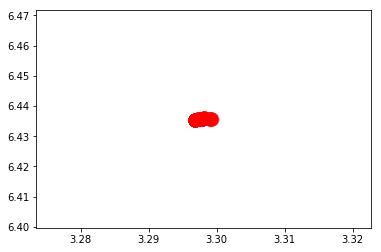

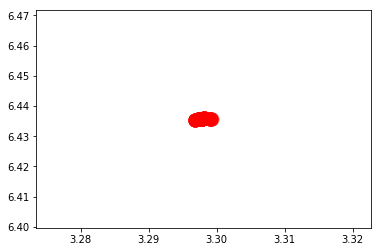

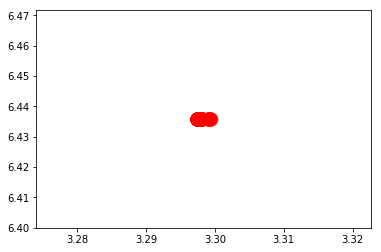

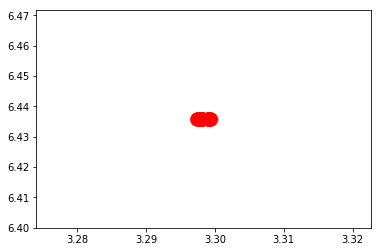

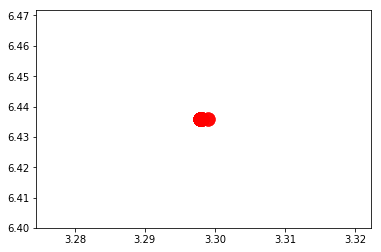

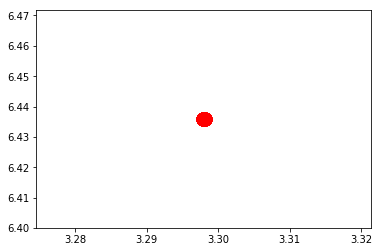

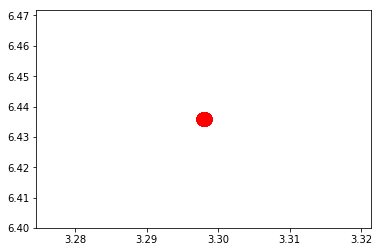

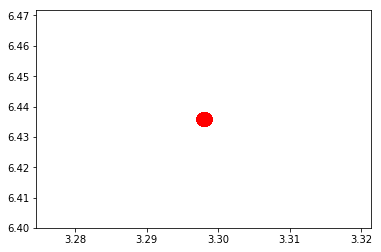

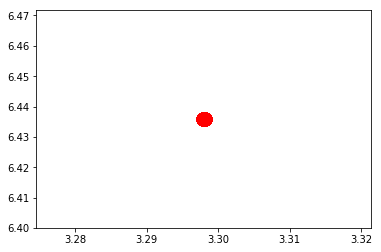

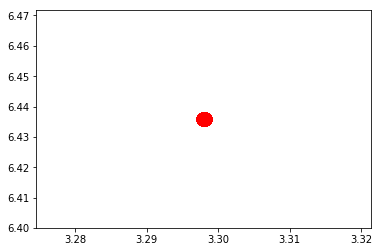

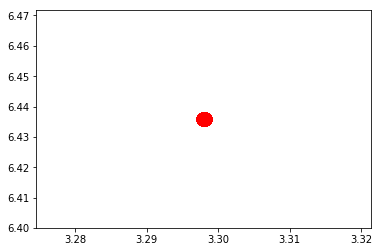

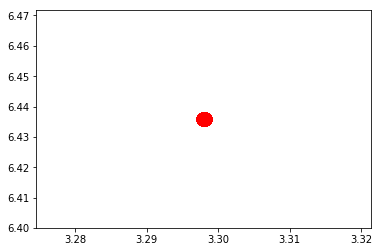

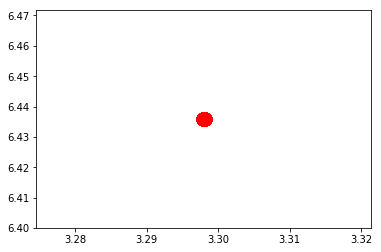

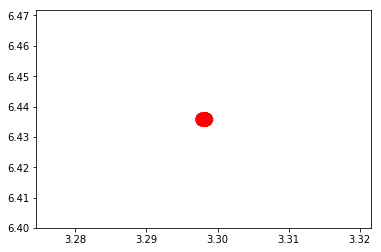

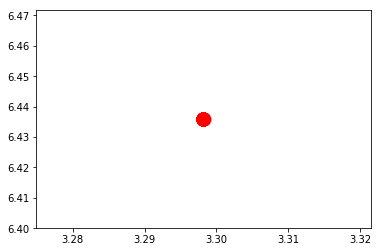

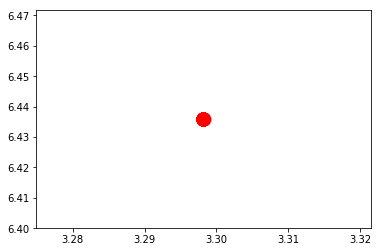

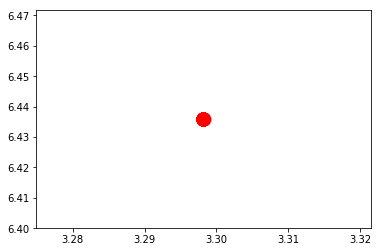

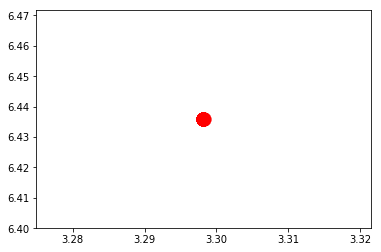

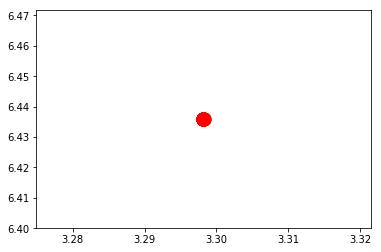

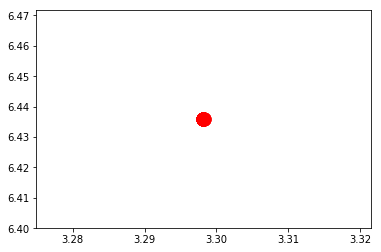

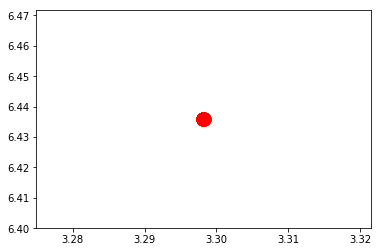

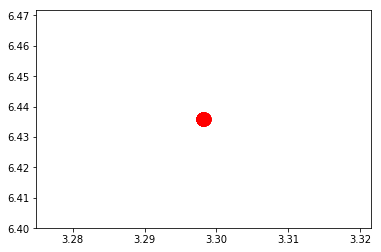

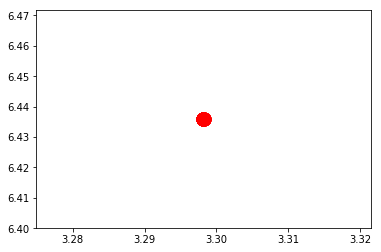

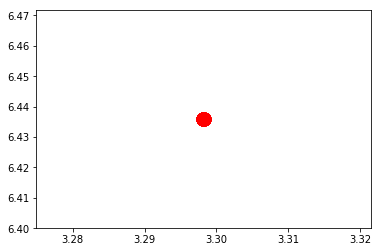

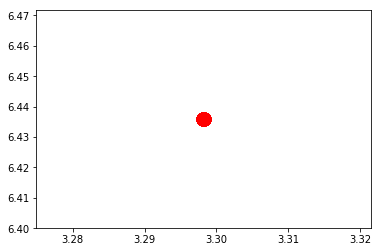

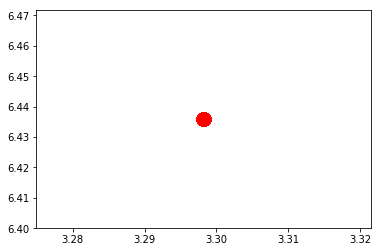

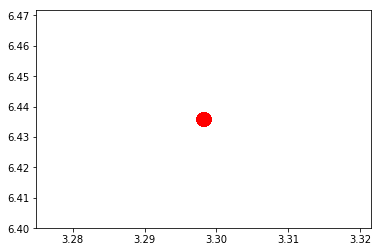

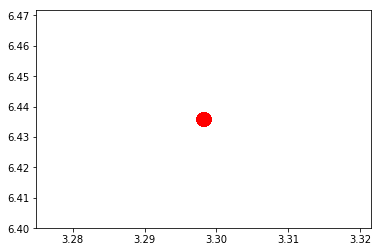

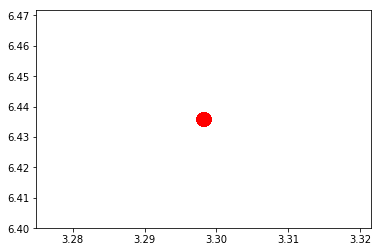

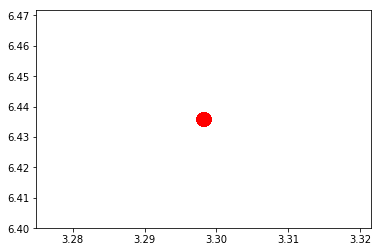

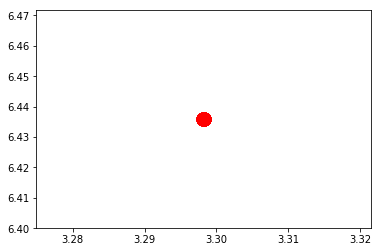

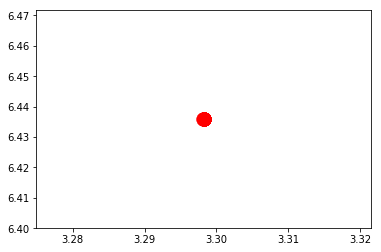

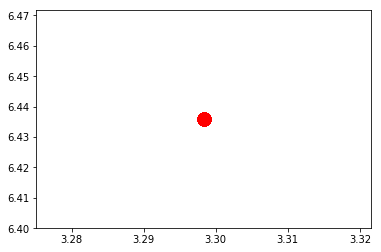

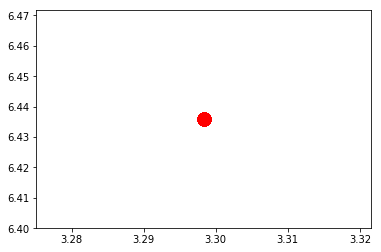

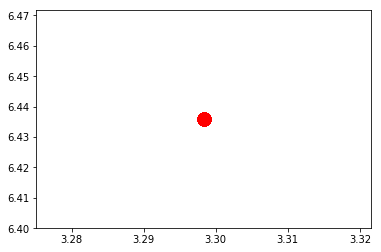

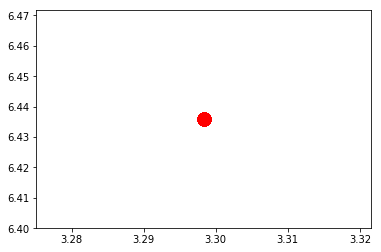

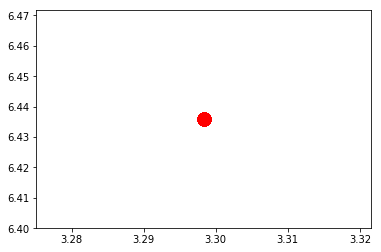

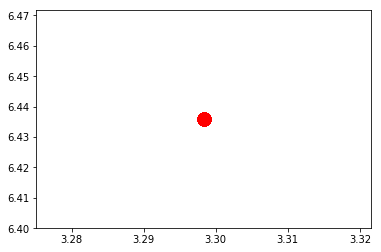

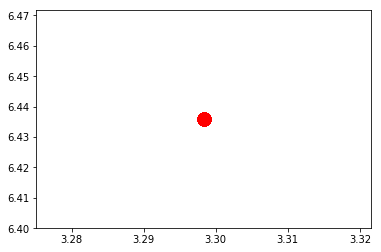

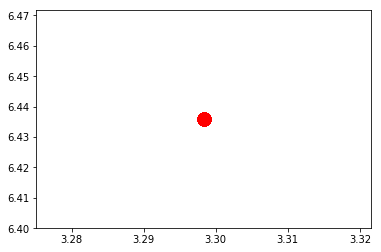

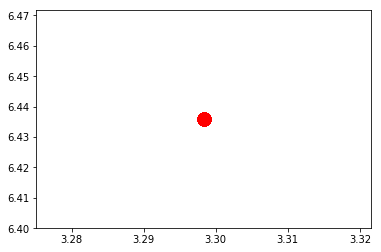

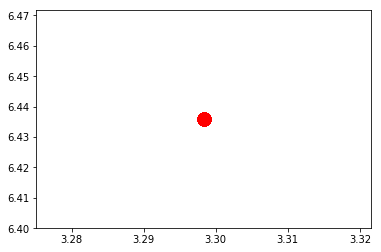

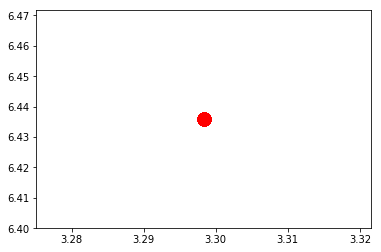

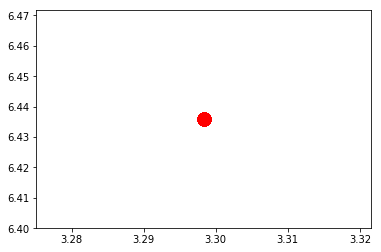

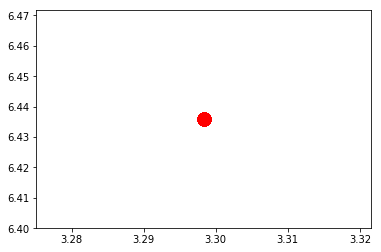

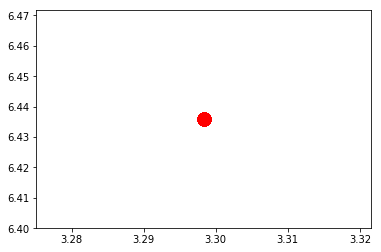

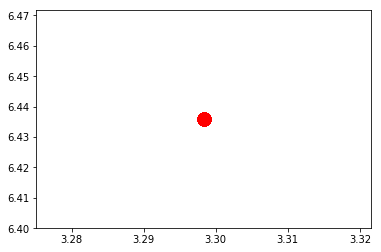

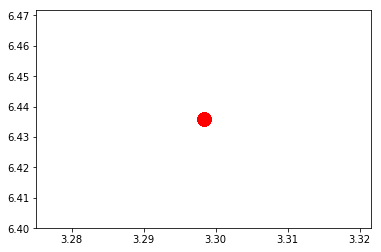

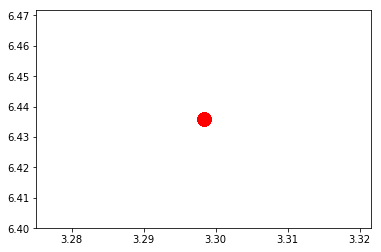

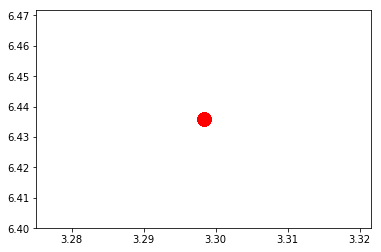

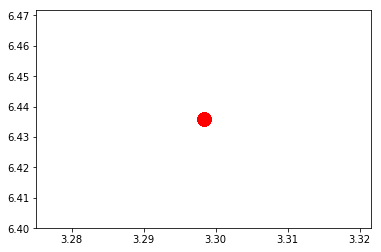

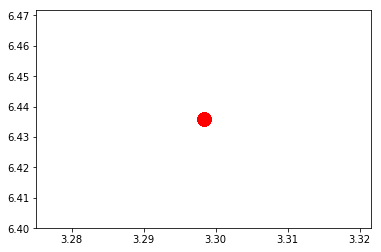

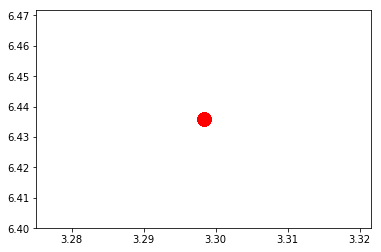

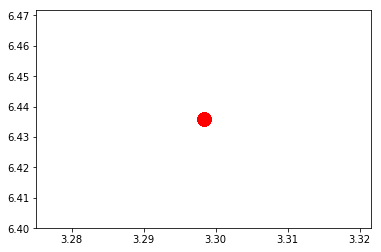

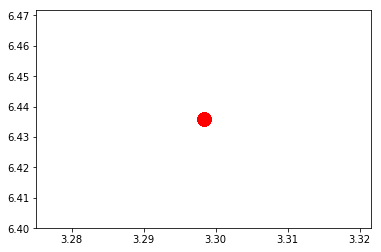

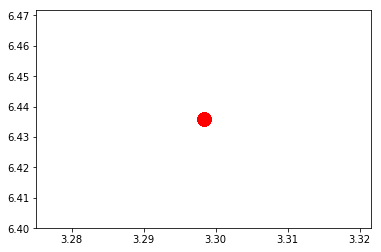

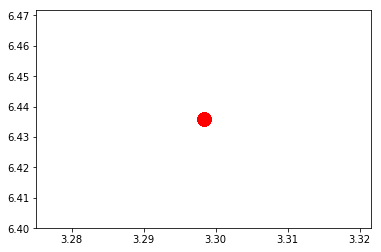

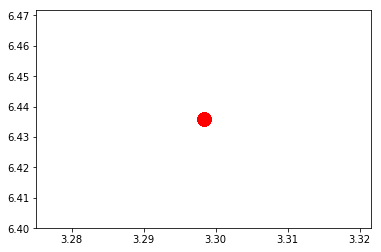

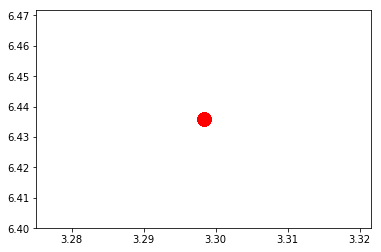

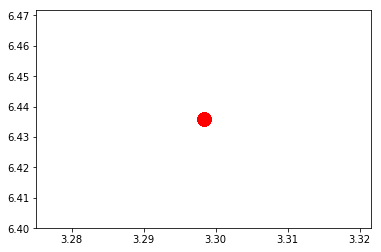

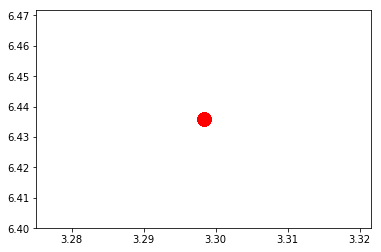

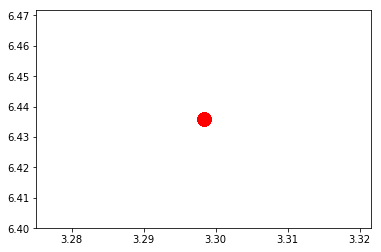

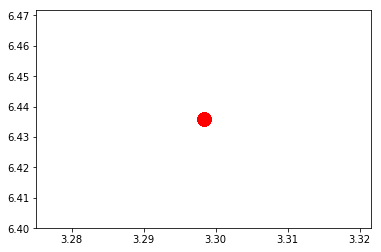

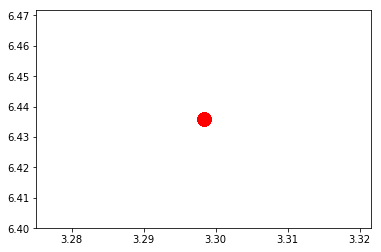

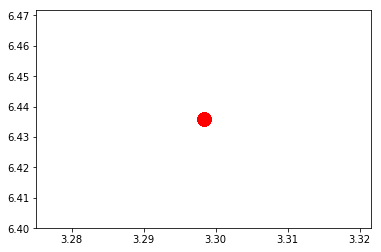

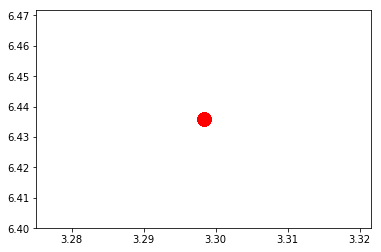

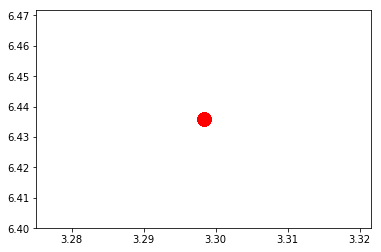

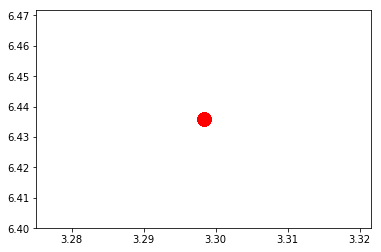

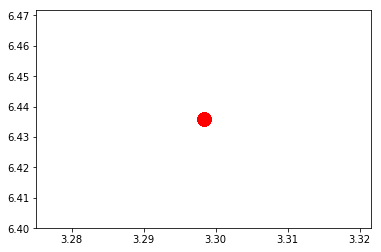

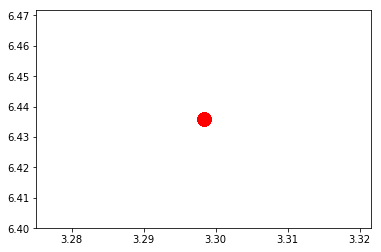

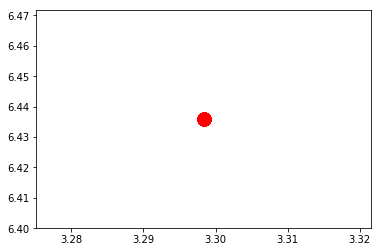

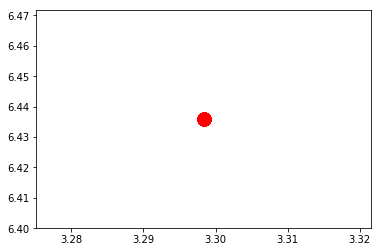

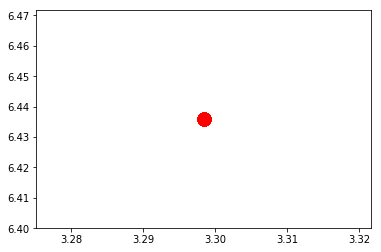

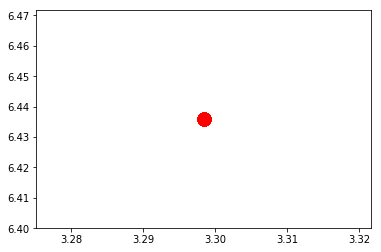

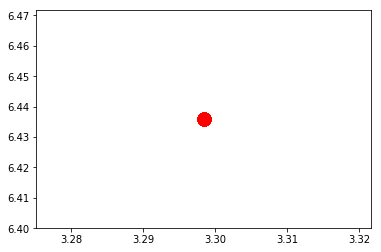

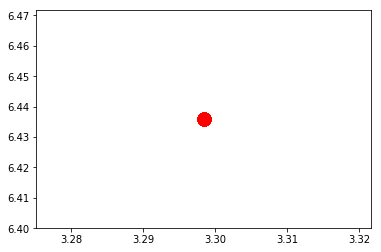

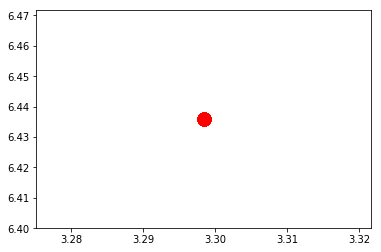

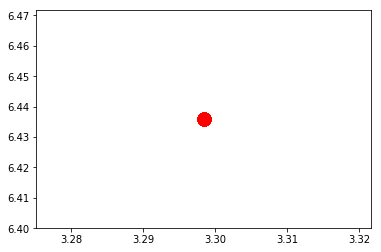

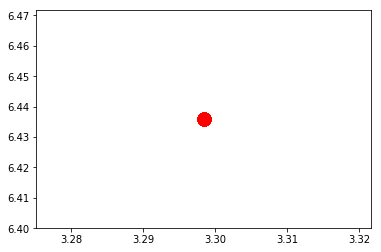

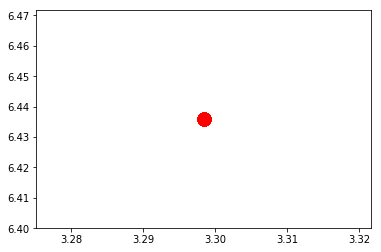

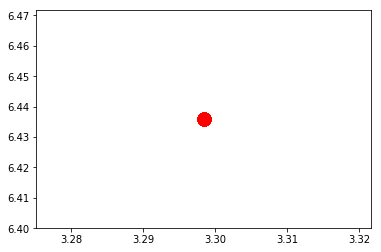

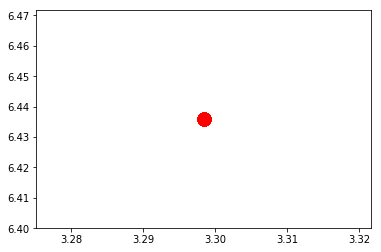

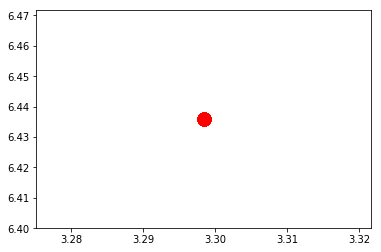

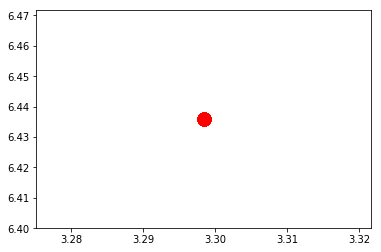

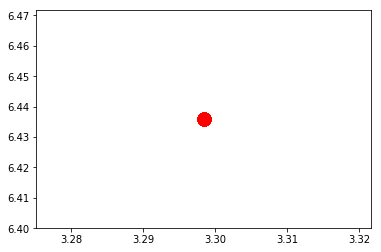

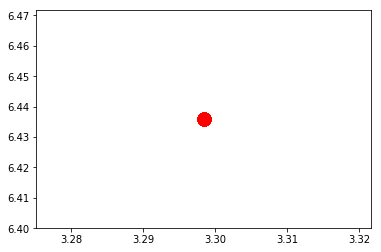

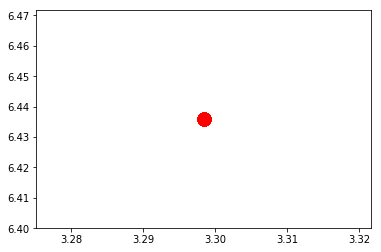

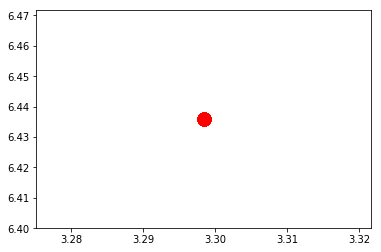

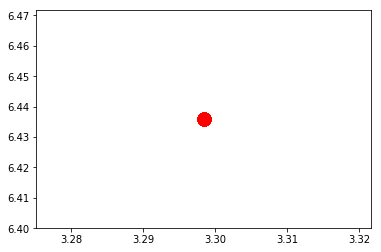

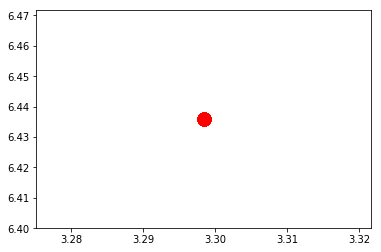

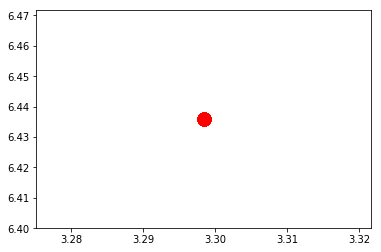

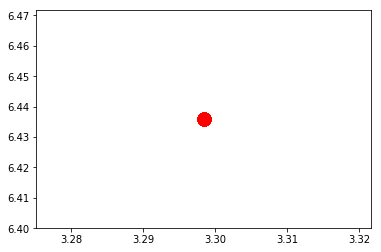

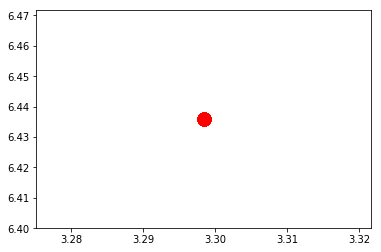

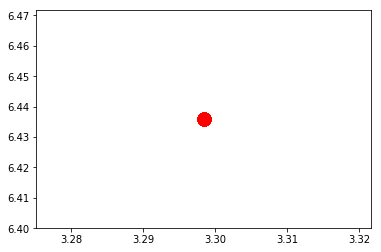

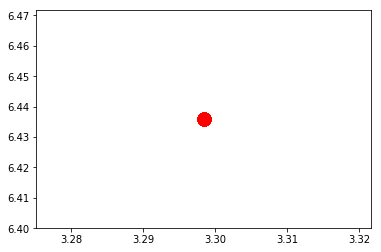

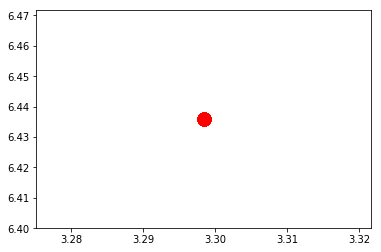

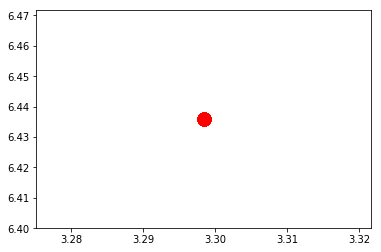

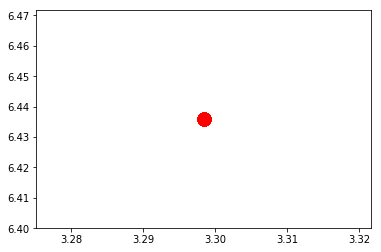

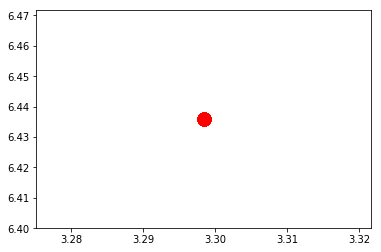

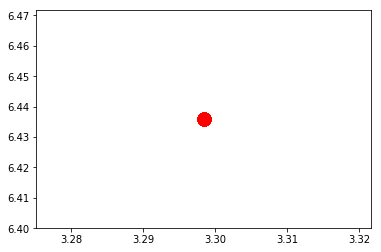

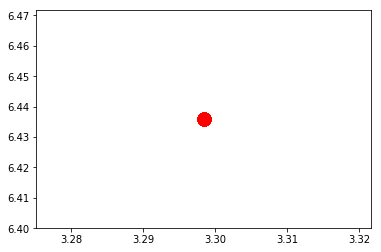

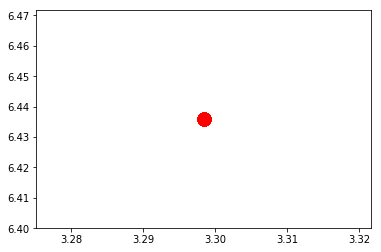

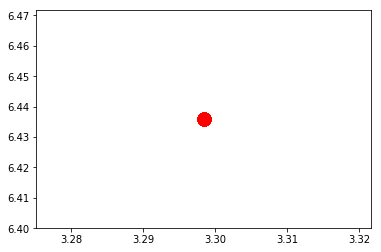

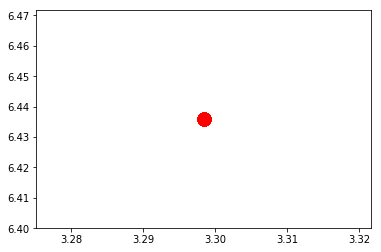

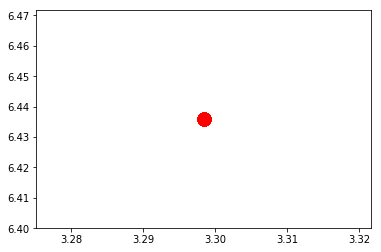

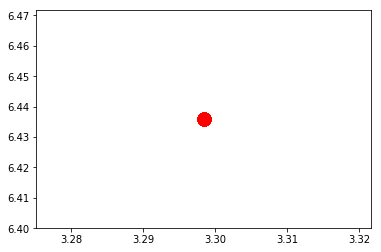

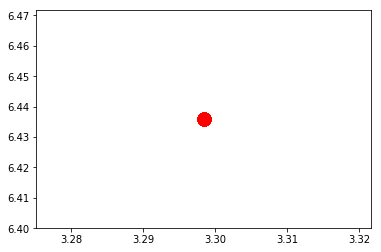

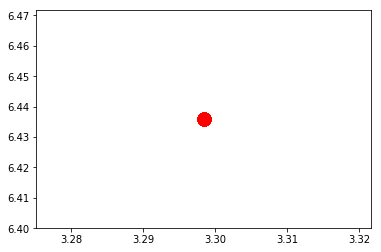

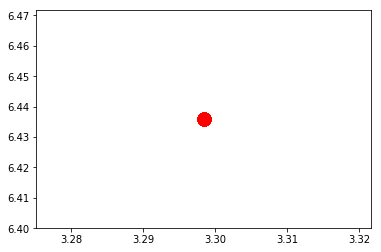

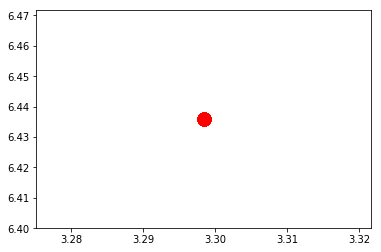

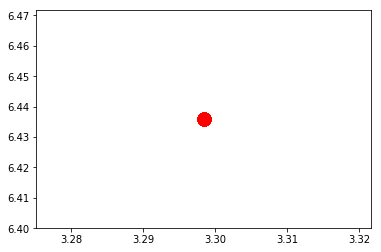

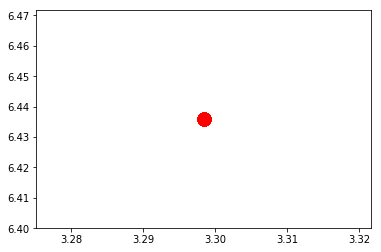

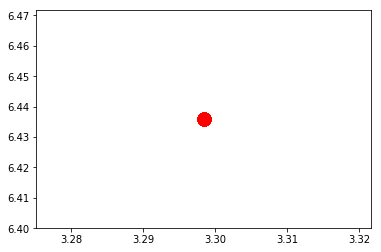

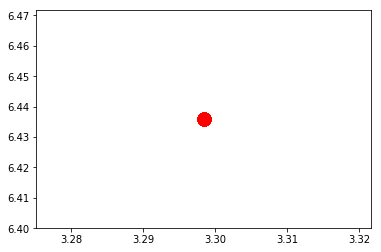

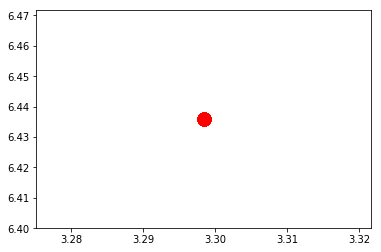

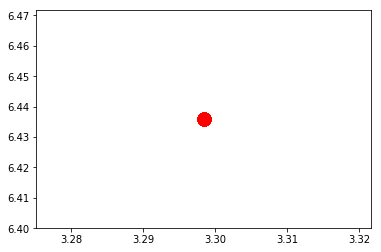

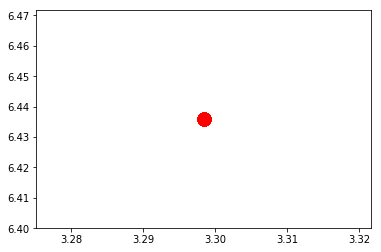

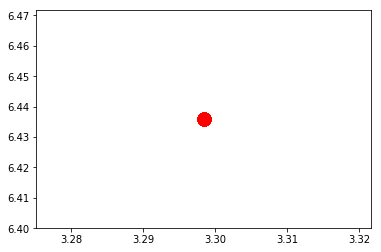

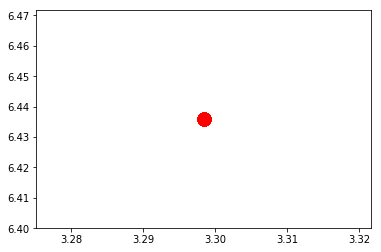

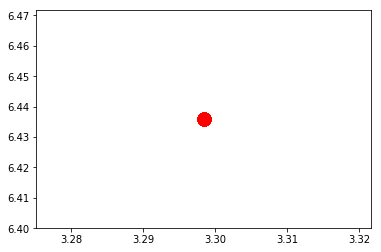

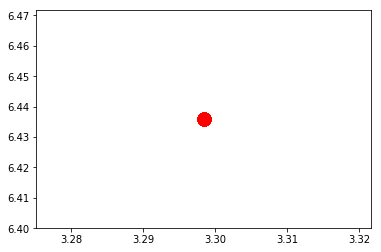

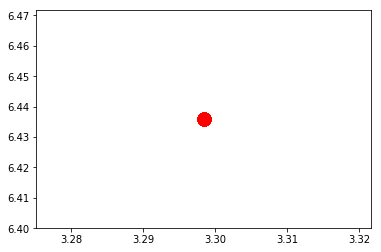

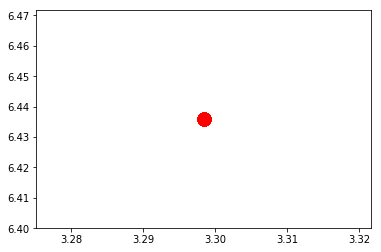

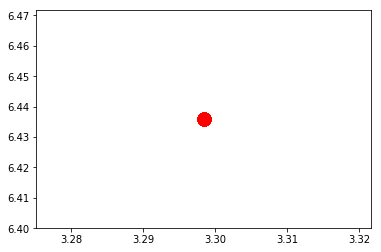

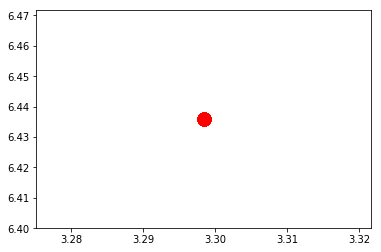

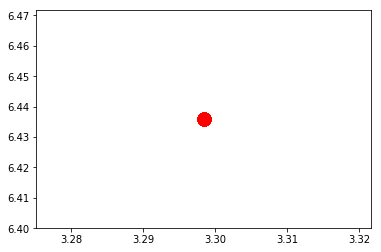

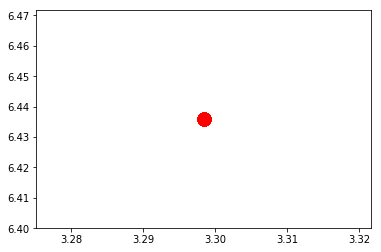

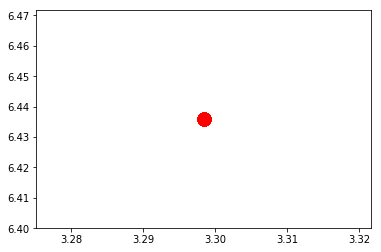

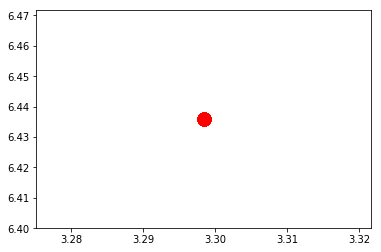

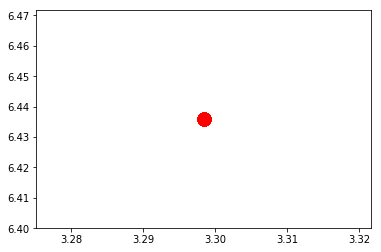

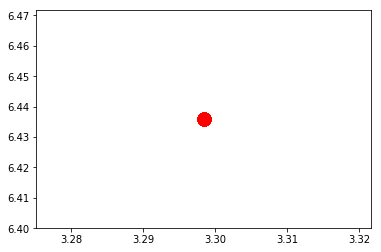

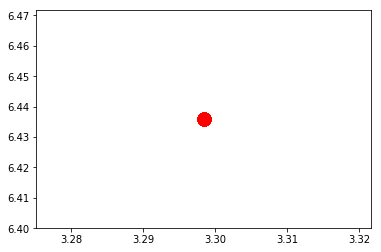

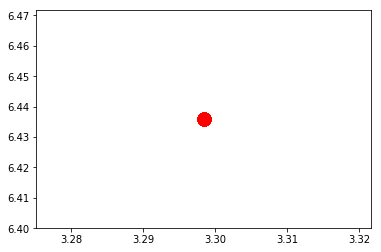

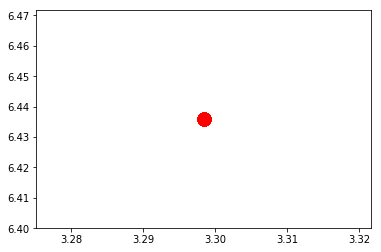

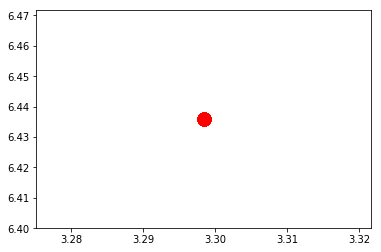

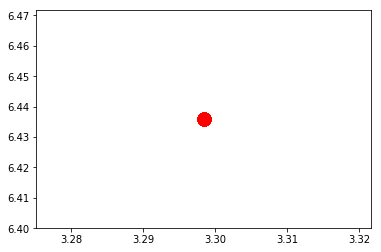

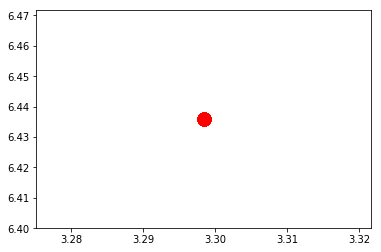

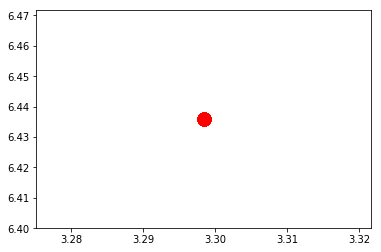

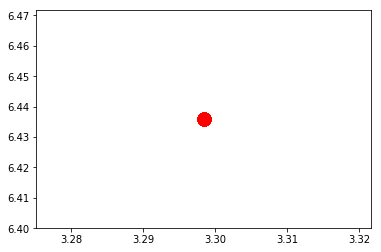

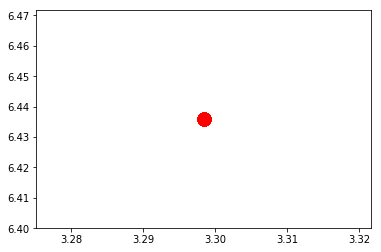

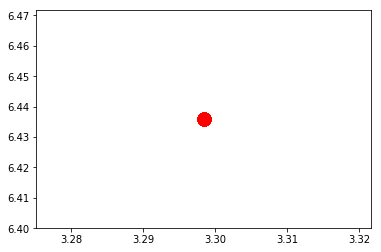

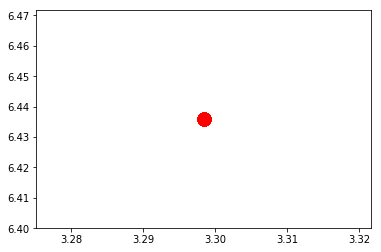

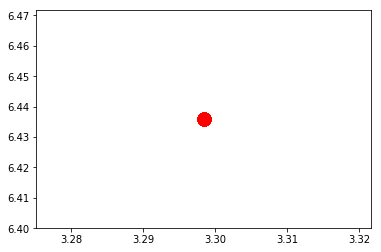

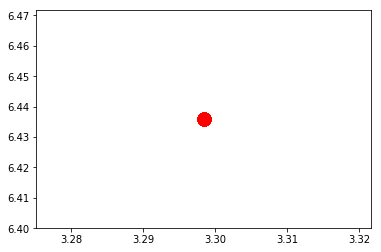

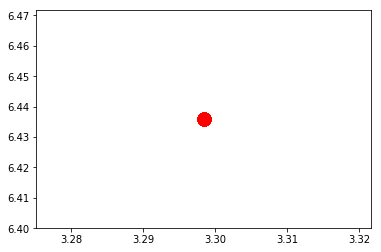

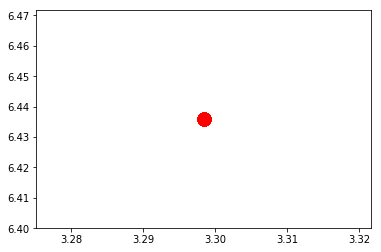

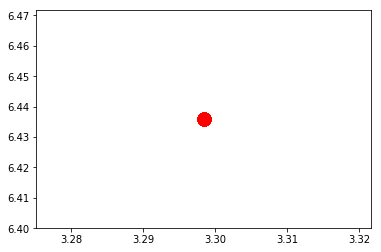

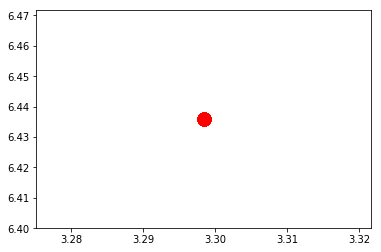

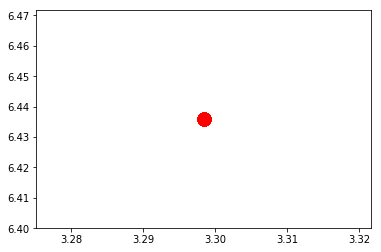

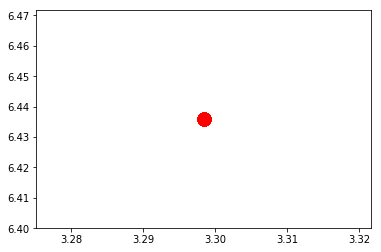

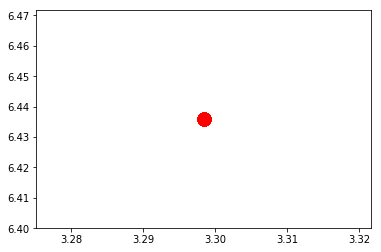

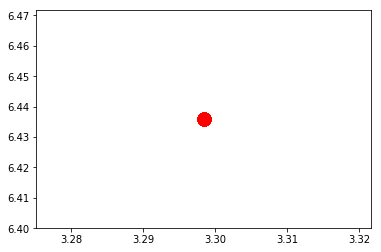

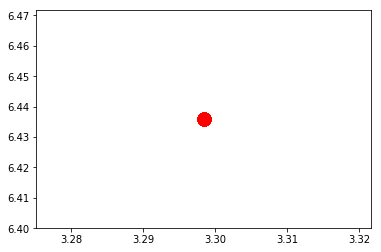

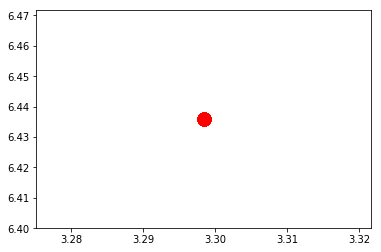

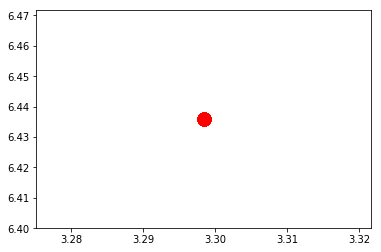

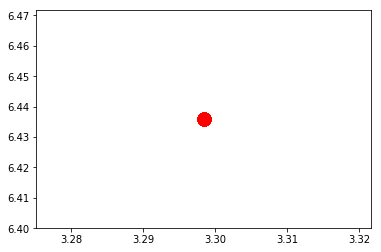

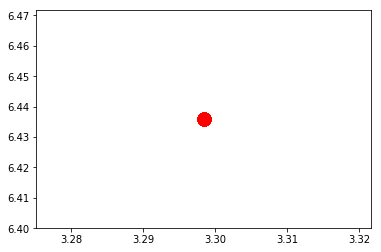

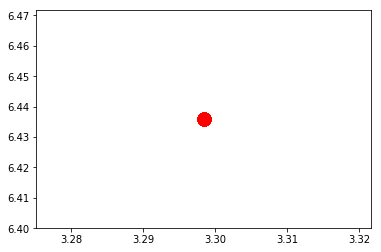

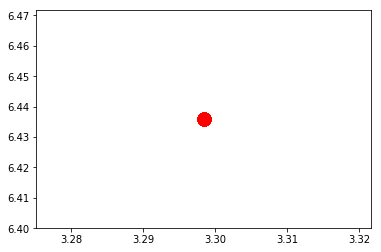

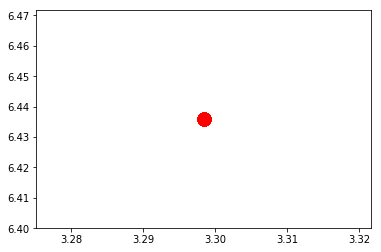

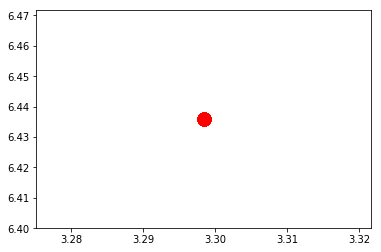

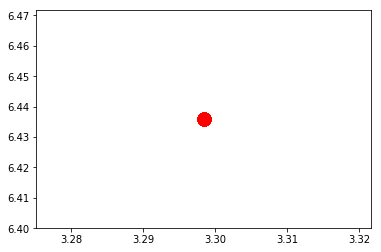

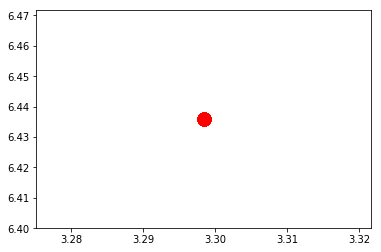

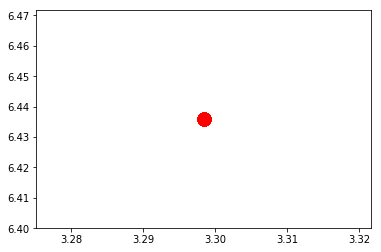

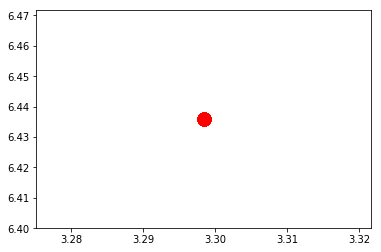

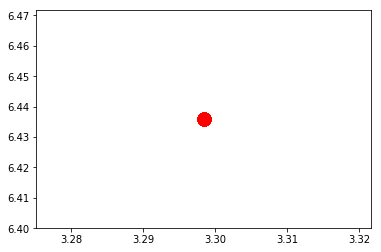

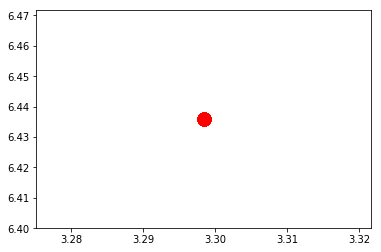

In [2]:
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 1             # DNA (real number)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
POP_SIZE = 100           # population size
N_KID = 50               # n kids per generation


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function


# find non-zero fitness for selection
def get_fitness(pred): return pred.flatten()


def make_kid(pop, n_kid):
    # generate empty kid holder
    kids = {'DNA': np.empty((n_kid, DNA_SIZE))}
    kids['mut_strength'] = np.empty_like(kids['DNA'])
    for kv, ks in zip(kids['DNA'], kids['mut_strength']):
        # crossover (roughly half p1 and half p2)
        p1, p2 = np.random.choice(np.arange(POP_SIZE), size=2, replace=False)
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)  # crossover points
        kv[cp] = pop['DNA'][p1, cp]
        kv[~cp] = pop['DNA'][p2, ~cp]
        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]

        # mutate (change DNA based on normal distribution)
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)    # must > 0
        kv += ks * np.random.randn(*kv.shape)
        kv[:] = np.clip(kv, *DNA_BOUND)    # clip the mutated value
    return kids


def kill_bad(pop, kids):
    # put pop and kids together
    for key in ['DNA', 'mut_strength']:
        pop[key] = np.vstack((pop[key], kids[key]))

    fitness = get_fitness(F(pop['DNA']))            # calculate global fitness
    idx = np.arange(pop['DNA'].shape[0])
    good_idx = idx[fitness.argsort()][-POP_SIZE:]   # selected by fitness ranking (not value)
    for key in ['DNA', 'mut_strength']:
        pop[key] = pop[key][good_idx]
    return pop


pop = dict(DNA=5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),   # initialize the pop DNA values
           mut_strength=np.random.rand(POP_SIZE, DNA_SIZE))                # initialize the pop mutation strength values

plt.ion()       # something about plotting
x = np.linspace(*DNA_BOUND, 200)
plt.plot(x, F(x))

for _ in range(N_GENERATIONS):
    # something about plotting
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(
        pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # ES part
    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)   # keep some good parent for elitism

plt.ioff(); plt.show()